* [1. Creacion de Dataset](#section1)
  * [1.1 Cargar DataFrame](#section11)
  * [1.2 Nombres de columnas](#section12)
  * [1.3 Limpiar el DataFrame](#section13)
     * [1.3.1 Limpiar el DataFrame con Ceros](#section131)
       * [1.3.1.1 Comparacion del DataFrame 'df' y 'df2'](#section1311)
       * [1.3.1.2 Comparacion del DataFrame 'df' y 'df3'](#section1312)
  * [1.4 Limpiar el DataFrame con SimpleImputer](#section14)
     * [1.4.1 Reemplazando por la media a la columna 'Valor2'](#section141)
     * [1.4.2 Reemplazando por la mediana a la columna 'Valor2'](#section142)

<a id="section1"></a>
## <font color="#004D7F">1. Importar librerias</font>

In [1]:
import pandas as pd
import os
import numpy as np

<a id="section11"></a>
## <font color="#004D7F">1.1 Cargar DataFrame</font>

In [2]:
df=pd.read_csv('Datos/Example_DataImputation.csv')

In [3]:
df.head(10)

,Valor1,Valor2,Valor3,Valor4
0,8.3252,41.0,6.984127,DDD
1,NaN,21.0,6.238137,BBB
2,7.2574,52.0,8.288136,CCC
3,NaN,52.0,5.817352,AAA
4,3.8462,52.0,6.281853,CCC
5,4.0368,52.0,NaN,DDD
6,NaN,NaN,NaN,CCC
7,NaN,NaN,4.797527,BBB
8,2.0804,NaN,4.294118,AAA
9,3.6912,52.0,4.970588,BBB


In [4]:
df.describe(include='all')

,Valor1,Valor2,Valor3,Valor4
count,660.000000,607.000000,743.000000,927
unique,NaN,NaN,NaN,4
top,NaN,NaN,NaN,CCC
freq,NaN,NaN,NaN,239
mean,3.822165,38.105437,5.187392,NaN
std,1.806333,13.159422,1.170151,NaN
min,0.499900,3.000000,1.714286,NaN
25%,2.562500,29.000000,4.337893,NaN
50%,3.481950,41.000000,5.045113,NaN
75%,4.828825,52.000000,5.922716,NaN


<a id="section12"></a>
## <font color="#004D7F">1.2 Nombres de columnas</font>

In [5]:
df.columns

Index(['Valor1', 'Valor2', 'Valor3', 'Valor4'], dtype='object')

In [6]:
df.Valor4.value_counts()

CCC    239
DDD    231
BBB    231
AAA    226
Name: Valor4, dtype: int64

In [7]:
239+231+231+226

927

<a id="section13"></a>
## <font color="#004D7F">1.3 Limpiar el DataFrame</font>

### se observa "count" que hay valores perdidos

In [8]:

df.describe()

,Valor1,Valor2,Valor3
count,660.000000,607.000000,743.000000
mean,3.822165,38.105437,5.187392
std,1.806333,13.159422,1.170151
min,0.499900,3.000000,1.714286
25%,2.562500,29.000000,4.337893
50%,3.481950,41.000000,5.045113
75%,4.828825,52.000000,5.922716
max,13.499000,52.000000,9.000000


<a id="section131"></a>
## <font color="#004D7F">1.3.1 Limpiar el DataFrame con Ceros</font>

### FORMA 1: Limpiar el DataFrame con Ceros

In [9]:
df1=df.fillna(0)

In [10]:
df1.describe()

,Valor1,Valor2,Valor3
count,1000.000000,1000.000000,1000.000000
mean,2.522629,23.130000,3.854232
std,2.331071,21.254996,2.482026
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,2.538550,25.000000,4.583205
75%,4.027925,44.000000,5.565260
max,13.499000,52.000000,9.000000


### FORMA 2: Limpiar el DataFrame con Ceros 

In [11]:
df2=df.replace(np.nan,0)

In [12]:
df2.describe()

,Valor1,Valor2,Valor3
count,1000.000000,1000.000000,1000.000000
mean,2.522629,23.130000,3.854232
std,2.331071,21.254996,2.482026
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,2.538550,25.000000,4.583205
75%,4.027925,44.000000,5.565260
max,13.499000,52.000000,9.000000


<a id="section1311"></a>
## <font color="#004D7F">1.3.1.1 Comparacion del DataFrame  'df'  y 'df2'</font>

### El DataFrame Original

<AxesSubplot:>

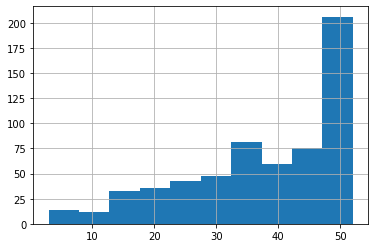

In [13]:
df.Valor2.hist()

### El DataFrame --> con ceros

<AxesSubplot:>

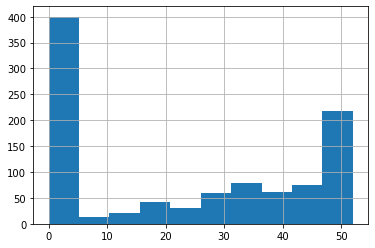

In [14]:
df2.Valor2.hist()

### Conclusion:
#### Se puede observar que el 'df' y el 'df2' son diferentes  GRAFICAMENTE lo que quiere decir que reemplazarlo por puros  cero al DataFrame
####  'df2 'no es conveniente, PROBEMOS CON LA MEDIA.

<a id="section1312"></a>
## <font color="#004D7F">1.3.1.2 Comparacion del DataFrame  'df'  y 'df3'</font>

In [15]:
df.Valor2.mean()

38.105436573311366

In [16]:
df3=df.fillna(df.Valor2.mean())

### df : El  DataFrame --> original

<AxesSubplot:>

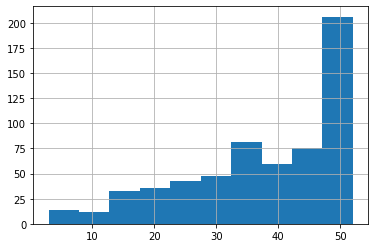

In [17]:
df.Valor2.hist()

### df3 : El  DataFrame --> con media de la columna 'Valor2'

<AxesSubplot:>

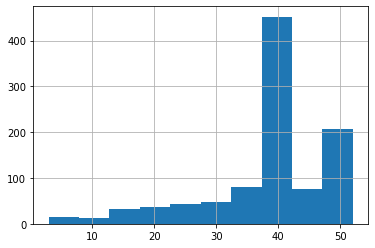

In [18]:
df3.Valor2.hist()

In [19]:
df3.describe()

,Valor1,Valor2,Valor3
count,1000.000000,1000.000000,1000.000000
mean,15.478477,38.105437,13.647329
std,16.314511,10.249210,14.426995
min,0.499900,3.000000,1.714286
25%,3.014475,36.000000,4.614113
50%,4.952400,38.105437,5.596838
75%,38.105437,44.000000,38.105437
max,38.105437,52.000000,38.105437


### Conclusion:
#### Se puede observar que el 'df' y el 'df3' son diferentes GRAFICAMENTE  lo que quiere decir que reemplazarlo por media  no es 
#### conveniente, PROBEMOS k-vecinos mas cercanos... PERO ESTA MEJOR QUE REEMPLAZARLO QUE POR PUROS CEROS.

### La TARGET  es Valor4

In [20]:
df.Valor4.unique()

array(['DDD', 'BBB', 'CCC', 'AAA', nan], dtype=object)

<a id="section14"></a>
## <font color="#004D7F">1.4 Limpiar el DataFrame con SimpleImputer</font>

### Numero de valores perdidos

In [21]:
df.isnull().sum()

Valor1    340
Valor2    393
Valor3    257
Valor4     73
dtype: int64

<a id="section141"></a>
## <font color="#004D7F">1.4.1  Reemplazando por la media a la columna 'Valor2'</font>


### SimpleImputer

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
df4=df

#### Paso 1 : imputador

In [24]:
imp=SimpleImputer(missing_values=np.nan,strategy='mean') #median ,most_Frequent

#### Paso 2 : ajustar

In [25]:
imp.fit(df4[['Valor2']])

SimpleImputer()

#### Paso 3: transformar

In [26]:
df4['Valor2']=imp.transform(df4[['Valor2']])

In [27]:
df4.isnull().sum()

Valor1    340
Valor2      0
Valor3    257
Valor4     73
dtype: int64

### df4 :  Media de la columna  'Valor2'

<AxesSubplot:>

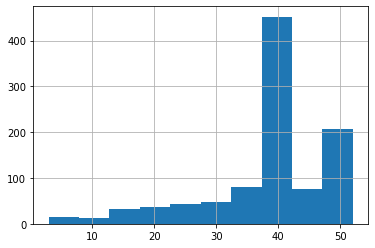

In [28]:
df4.Valor2.hist()

### df: Es el original

<AxesSubplot:>

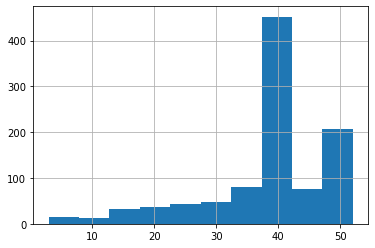

In [29]:
df.Valor2.hist()

<a id="section142"></a>
## <font color="#004D7F">1.4.2 Reemplazando por la mediana a la columna 'Valor2'</font>



### SimpleImputer

In [30]:
from sklearn.impute import SimpleImputer

In [31]:
df5=df

#### Paso 1 : imputador

In [32]:
imp=SimpleImputer(missing_values=np.nan,strategy='median') #most_Frequent,mean

#### Paso 2 : ajustar

In [33]:
imp.fit(df5[['Valor2']])

SimpleImputer(strategy='median')

#### Paso 3: transformar

In [34]:
df5['Valor2']=imp.transform(df5[['Valor2']])

In [35]:
df5.isnull().sum()

Valor1    340
Valor2      0
Valor3    257
Valor4     73
dtype: int64

### df5 : Mediana de la columna 'Valor2'

<AxesSubplot:>

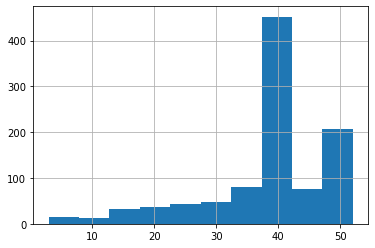

In [36]:
df5.Valor2.hist()

### df: Es el original

<AxesSubplot:>

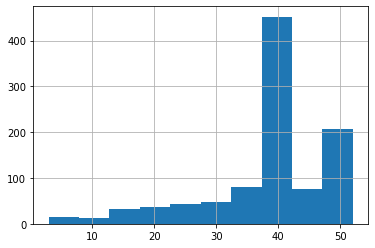

In [37]:
df.Valor2.hist()